In [1]:
import pandas as pd 
import numpy as np
import ast
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
df2 = pd.read_csv('Affect/TD2_Affect.csv')
print("Baby 2 done!")
df3 = pd.read_csv('Affect/TD3_Affect.csv')
print("Baby 3 done!")
df4 = pd.read_csv('Affect/TD4_Affect.csv')
print("Baby 4 done!")
df6 = pd.read_csv('Affect/TD6_Affect.csv')
print("Baby 6 done!")
df7 = pd.read_csv('Affect/TD7_Affect.csv')
print("Baby 7 done!")
df8 = pd.read_csv('Affect/TD8_Affect.csv')
print("Baby 8 done!")
df9 = pd.read_csv('Affect/TD9_Affect.csv')
print("Baby 9 done!")
df12 = pd.read_csv('Affect/TD12_Affect.csv')
print("Baby 12 done!")
df14 = pd.read_csv('Affect/TD14_Affect.csv')
print("Baby 14 done!")
df = pd.concat([df2, df3, df4, df6, df7, df8, df9, df12, df14], ignore_index=True)
print("FINAL BEHAVIORAL STATE DATAFRAME - READY!")

Baby 2 done!
Baby 3 done!
Baby 4 done!
Baby 6 done!
Baby 7 done!
Baby 8 done!
Baby 9 done!
Baby 12 done!
Baby 14 done!
FINAL BEHAVIORAL STATE DATAFRAME - READY!


In [3]:
df.to_csv('FINAL_BEHAVIORAL_STATE_DATAFRAME.csv')

In [4]:
df = df.drop(index=df[df['affect']=='n'].index)
df = df.reset_index(drop=True)

In [5]:
df.head()

,timestamp,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature2271.1,feature2272.1,feature2273.1,feature2274.1,feature2275.1,feature2276.1,feature2277.1,feature2278.1,synced_timestamp,affect
0,00:00:47.900000,0.367517,0.737452,1.116747,1.476204,1.821936,2.144186,2.449769,2.706714,2.962783,...,-0.003222,-0.004629,-0.008173,-0.012992,-0.014052,-0.007003,-0.004961,-0.001530,0 days 00:01:33.000000000,a
1,00:00:47.933000,0.367517,0.737452,1.116747,1.471278,1.830188,2.149291,2.472922,2.730096,2.986086,...,0.000000,-0.000486,0.000000,0.001087,0.000000,0.004424,0.000000,-0.000917,0 days 00:01:33.033000000,a
2,00:00:48.100000,0.362844,0.745182,1.124362,1.482095,1.843655,2.187054,2.514440,2.784434,3.037603,...,0.005485,0.009896,0.016023,0.021061,0.026021,0.005242,0.010083,0.004973,0 days 00:01:33.200000000,a
3,00:00:48.133000,0.367497,0.737643,1.138779,1.501100,1.882902,2.229616,2.560493,2.831874,3.100943,...,0.001768,-0.013557,0.006659,0.008361,-0.006958,-0.002550,-0.015592,-0.015350,0 days 00:01:33.233000000,a
4,00:00:48.166000,0.359406,0.742256,1.140494,1.492409,1.851763,2.183525,2.507926,2.786084,3.036546,...,0.017407,0.013910,-0.008313,-0.009358,-0.011914,0.001913,-0.002426,-0.002292,0 days 00:01:33.266000000,a


In [6]:
df.tail()

,timestamp,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature2271.1,feature2272.1,feature2273.1,feature2274.1,feature2275.1,feature2276.1,feature2277.1,feature2278.1,synced_timestamp,affect
29223,00:08:37.233000,0.354026,0.723533,1.120381,1.507718,1.892204,2.239057,2.613931,2.933800,3.166806,...,-0.014308,0.000000,-0.039003,-0.021769,-0.019523,0.019230,0.019548,0.000000,0 days 00:11:59.433000000,f
29224,00:08:37.266000,0.352875,0.724503,1.129541,1.500447,1.883178,2.250330,2.626129,2.930681,3.164034,...,0.017769,0.036353,0.020261,0.020457,0.040122,0.000159,0.019862,0.019389,0 days 00:11:59.466000000,f
29225,00:08:37.299000,0.333333,0.685370,1.087899,1.476508,1.839644,2.180548,2.556114,2.860217,3.109065,...,0.006353,-0.012524,0.019529,0.020381,0.001191,-0.001620,-0.018686,-0.019256,0 days 00:11:59.499000000,f
29226,00:08:37.333000,0.358854,0.704855,1.092866,1.487895,1.880787,2.248918,2.587115,2.872005,3.110319,...,0.021342,0.028999,-0.004897,0.014444,0.018764,0.023527,0.023863,0.007552,0 days 00:11:59.533000000,f
29227,00:08:37.366000,0.358854,0.704855,1.092866,1.487895,1.880787,2.248918,2.587115,2.872005,3.110319,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:11:59.566000000,f


In [7]:
features = list(df.columns)[1:-2]
x = df.loc[:, features].values
y = df.loc[:,['affect']].values

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [9]:
principalDf.head()

,principal component 1,principal component 2
0,-5.422571,-8.196998
1,-5.440716,-7.727627
2,-2.290826,-7.269192
3,-1.280136,-7.109255
4,-2.883576,-7.635259


In [10]:
principalDf.tail()

,principal component 1,principal component 2
29223,6.525053,-8.900731
29224,6.284967,-8.296601
29225,5.955141,-8.823659
29226,8.844178,-10.364297
29227,8.689221,-10.323148


In [11]:
finalDf = pd.concat([principalDf, df['affect']], axis = 1)

In [12]:
finalDf.head()

,principal component 1,principal component 2,affect
0,-5.422571,-8.196998,a
1,-5.440716,-7.727627,a
2,-2.290826,-7.269192,a
3,-1.280136,-7.109255,a
4,-2.883576,-7.635259,a


In [13]:
finalDf.tail()

,principal component 1,principal component 2,affect
29223,6.525053,-8.900731,f
29224,6.284967,-8.296601,f
29225,5.955141,-8.823659,f
29226,8.844178,-10.364297,f
29227,8.689221,-10.323148,f


In [14]:
pca.explained_variance_ratio_

array([0.64687853, 0.12410793])

In [15]:
analysis_DF = pd.DataFrame(pca.components_, columns=features, index = ['PC1','PC2'])

most_highly_correlated_feature = analysis_DF.idxmax(axis=1)
hc_value = analysis_DF.max(axis=1)
most_negatively_correlated_feature = analysis_DF.idxmin(axis=1)
nc_value = analysis_DF.min(axis=1)

ana_df  = pd.DataFrame(columns = ["Corr", "Feature Name", "Value"])
l = ["High", most_highly_correlated_feature, hc_value]
ana_df.loc[len(ana_df)] = l
m = ["Low", most_negatively_correlated_feature, nc_value]
ana_df.loc[len(ana_df)] = m

ana_df

,Corr,Feature Name,Value
0,High,PC1 feature810 PC2 feature288 dtype: object,PC1 0.052664 PC2 0.051798 dtype: float64
1,Low,PC1 feature29 PC2 feature966 dtype: object,PC1 -0.023114 PC2 -0.049807 dtype: float64


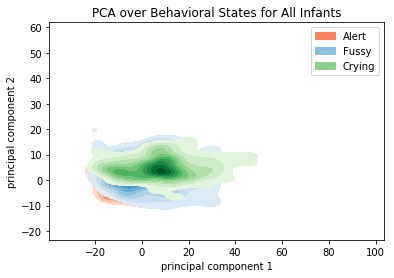

In [16]:
# Setting up the samples 
df_a = finalDf.query("affect=='a'")
df_f = finalDf.query("affect=='f'")
df_c = finalDf.query("affect=='c'")

label_patches = []

# Plotting the KDE Plot Alert
sns.kdeplot(df_a['principal component 1'], df_a['principal component 2'], shade=True, cmap="Reds", 
            shade_lowest=False)

label = 'Alert'
label_patch = mpatches.Patch(color=sns.color_palette("Reds")[2], label=label)
label_patches.append(label_patch)

# Plotting the KDE Plot Fussy
sns.kdeplot(df_f['principal component 1'], df_f['principal component 2'], shade=True, cmap="Blues", 
            shade_lowest=False)

label = 'Fussy'
label_patch = mpatches.Patch(color=sns.color_palette("Blues")[2], label=label)
label_patches.append(label_patch)

# Plotting the KDE Plot Crying
sns.kdeplot(df_c['principal component 1'], df_c['principal component 2'], shade=True, cmap="Greens", 
            shade_lowest=False)

label = 'Crying'
label_patch = mpatches.Patch(color=sns.color_palette("Greens")[2], label=label)
label_patches.append(label_patch)

plt.title('PCA over Behavioral States for All Infants')
plt.legend(handles=label_patches, loc='upper right')
#plt.show()

plt.savefig('PCA_Affect/Combined.png')

# STATISTICAL TESTING

In [17]:
import scipy

## Principal Component 1

In [18]:
df_a_pc1 = df_a['principal component 1']
df_f_pc1 = df_f['principal component 1']
df_c_pc1 = df_c['principal component 1']

### Alert & Fussy

In [19]:
scipy.stats.ttest_ind(df_a_pc1, df_f_pc1, equal_var=False)

Ttest_indResult(statistic=-37.52550602456018, pvalue=5.419976123124923e-292)

In [6]:
5.419976123124923e-292 < 0.001

True

/Users/dhiti/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dhiti/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


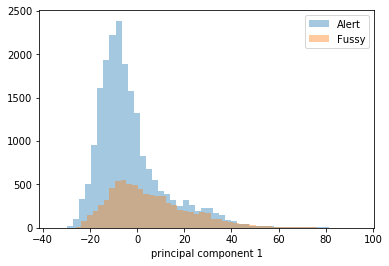

In [21]:
sns.distplot(df_a_pc1, label='Alert', kde=False)
sns.distplot(df_f_pc1, label='Fussy', kde=False)
plt.legend()

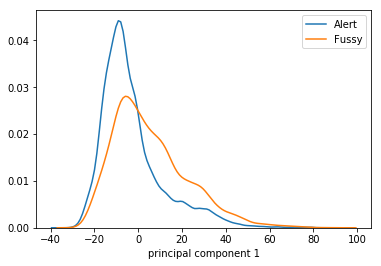

In [22]:
sns.distplot(df_a_pc1, label='Alert', hist=False)
sns.distplot(df_f_pc1, label='Fussy', hist=False)
plt.legend()

### Alert & Crying

In [23]:
scipy.stats.ttest_ind(df_a_pc1, df_c_pc1, equal_var=False)

Ttest_indResult(statistic=-24.47469726003178, pvalue=2.5559191030116655e-108)

In [7]:
2.5559191030116655e-108 < 0.001

True

/Users/dhiti/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dhiti/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


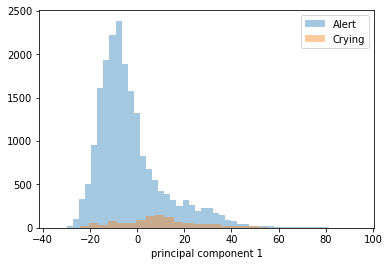

In [24]:
sns.distplot(df_a_pc1, label='Alert', kde=False)
sns.distplot(df_c_pc1, label='Crying', kde=False)
plt.legend()

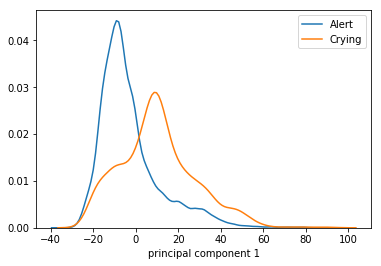

In [26]:
sns.distplot(df_a_pc1, label='Alert', hist=False)
sns.distplot(df_c_pc1, label='Crying', hist=False)
plt.legend()

### Fussy & Crying

In [27]:
scipy.stats.ttest_ind(df_a_pc1, df_c_pc1, equal_var=False)

Ttest_indResult(statistic=-24.47469726003178, pvalue=2.5559191030116655e-108)

In [8]:
2.5559191030116655e-108 < 0.001

True

/Users/dhiti/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dhiti/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


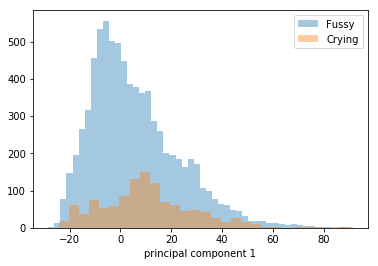

In [28]:
sns.distplot(df_f_pc1, label='Fussy', kde=False)
sns.distplot(df_c_pc1, label='Crying', kde=False)
plt.legend()

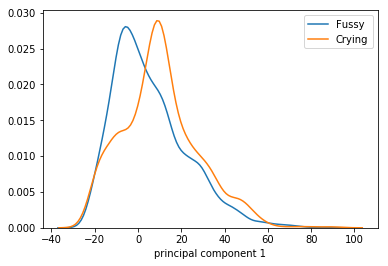

In [29]:
sns.distplot(df_f_pc1, label='Fussy', hist=False)
sns.distplot(df_c_pc1, label='Crying', hist=False)
plt.legend()

## Principal Component 2

In [30]:
df_a_pc2 = df_a['principal component 2']
df_f_pc2 = df_f['principal component 2']
df_c_pc2 = df_c['principal component 2']

### Alert & Fussy

In [32]:
scipy.stats.ttest_ind(df_a_pc2, df_f_pc2, equal_var=False)

Ttest_indResult(statistic=-52.47344995815503, pvalue=0.0)

/Users/dhiti/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dhiti/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


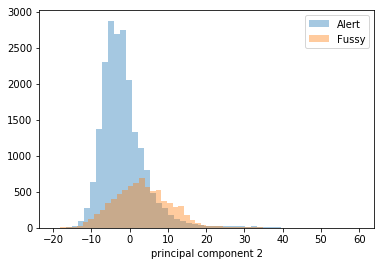

In [31]:
sns.distplot(df_a_pc2, label='Alert', kde=False)
sns.distplot(df_f_pc2, label='Fussy', kde=False)
plt.legend()

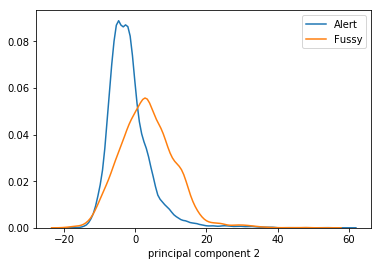

In [33]:
sns.distplot(df_a_pc2, label='Alert', hist=False)
sns.distplot(df_f_pc2, label='Fussy', hist=False)

### Alert & Crying

In [34]:
scipy.stats.ttest_ind(df_a_pc2, df_c_pc2, equal_var=False)

Ttest_indResult(statistic=-38.02868034305248, pvalue=1.0611303266938025e-212)

In [9]:
1.0611303266938025e-212 < 0.001

True

/Users/dhiti/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dhiti/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


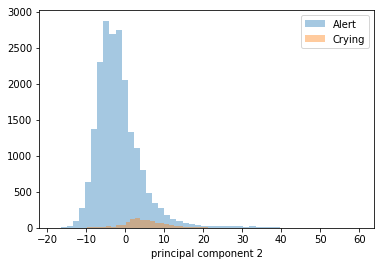

In [35]:
sns.distplot(df_a_pc2, label='Alert', kde=False)
sns.distplot(df_c_pc2, label='Crying', kde=False)
plt.legend()

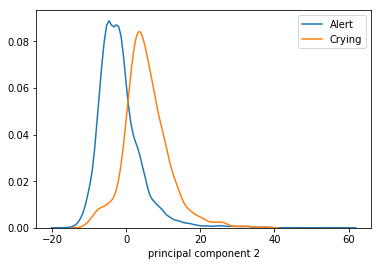

In [37]:
sns.distplot(df_a_pc2, label='Alert', hist=False)
sns.distplot(df_c_pc2, label='Crying', hist=False)

### Fussy & Crying

In [38]:
scipy.stats.ttest_ind(df_f_pc2, df_c_pc2, equal_var=False)

Ttest_indResult(statistic=-9.728765045550455, pvalue=8.06175746834935e-22)

In [10]:
8.06175746834935e-22 < 0.001

True

/Users/dhiti/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dhiti/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


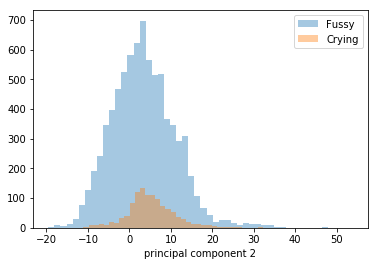

In [39]:
sns.distplot(df_f_pc2, label='Fussy', kde=False)
sns.distplot(df_c_pc2, label='Crying', kde=False)
plt.legend()

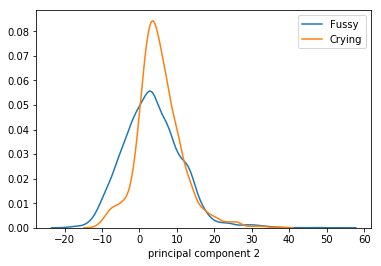

In [40]:
sns.distplot(df_f_pc2, label='Fussy', hist=False)
sns.distplot(df_c_pc2, label='Crying', hist=False)

1. 1 page write up Analysis
1.1 satistically sig diff betw facial features (p value)
1.2 fussy variance pc2 
1.3 To add
software
how did you extarct facial features, what features
which infants
pca, visualizations
conclusion!!
2. Legends